# **1. Exploração e análise de dados de crédito com SQL**

#### **Objetivo:**

Neste projeto, conduziremos a exploração e análise de dados de clientes de uma instituição financeira. Nosso objetivo é compreender o comportamento financeiro dos clientes, examinando a correlação entre gastos, salários, inadimplência e outros aspectos relacionados.

#### **Atributos:**

Os dados apresentam as informações dos clientes de uma instituição financeira e incluem as seguintes colunas:

* **idade** = idade do cliente
* **sexo** = sexo do cliente (F ou M)
* **dependentes** = número de dependentes do cliente
* **escolaridade** = nível de escolaridade do clientes
* **salario_anual** = faixa salarial do cliente
* **tipo_cartao** = tipo de cartao do cliente
* **qtd_produtos** = quantidade de produtos comprados nos últimos 12 meses
* **iteracoes_12m** = quantidade de iterações/transacoes nos ultimos 12 meses
* **meses_inativo_12m** = quantidade de meses que o cliente ficou inativo
* **limite_credito** = limite de credito do cliente
* **valor_transacoes_12m** = valor das transações dos ultimos 12 meses
* **qtd_transacoes_12m** = quantidade de transacoes dos ultimos 12 meses

> Esta tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

> **OBS:** A base de dados original contém mais linhas do que a seleção utilizada neste projeto. A redução dos dados foi realizada devido aos propósitos de estudo e às limitações do plano gratuito da AWS.

# **2. Exploraçao dos Dados**


Nesta primeira fase da análise, vamos realizar uma exploração para compreender os dados que temos disponíveis.

**2.1 Qual a quantidade de informações temos na nossa base de dados? E como sao os dados?**

**QUERY:** SELECT count(*) FROM credito
> 2.564 Linhas

**QUERY:** SELECT * FROM credito LIMIT 10;

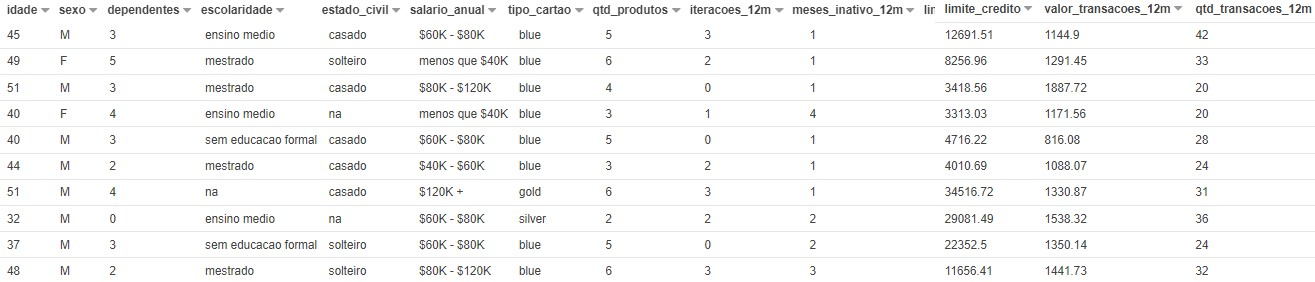

**2.2 Tipos de Dados:**

**QUERY:** DESCRIBE credito

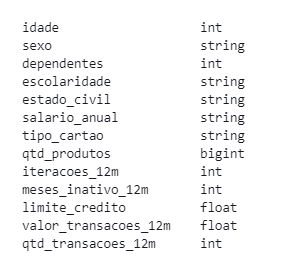

> Com esses dados, já podemos identificar a presença de informações nulas na tabela, bem como obter detalhes sobre os tipos de dados utilizados.

**2.3 Quais são os tipos de escolaridade presentes no dataset?**

**QUERY**: SELECT DISTINCT escolaridade FROM credito

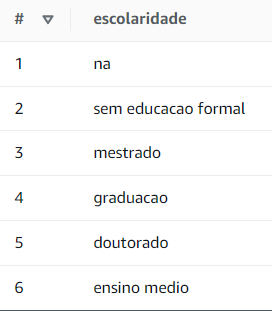

**2.4 Quais são os tipos de estado_civil presentes no dataset?**

**QUERY**: SELECT DISTINCT estado_civil FROM credito

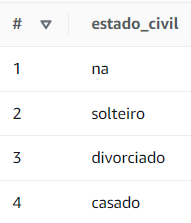

> Os dados contam com vários níveis de escolaridade e estado civel, e é possível perceber que temos valores nulos (na) no dataset.

**2.5 Quais são os tipos de salario_anual presentes no dataset?**

**QUERY**: SELECT DISTINCT salario_anual FROM credito

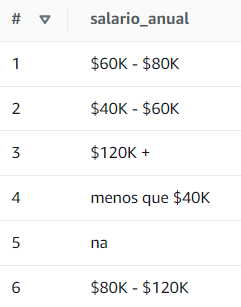

> Os salários não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos.

**2.6 Quais são os tipos de cartão presentes no dataset?**

**QUERY**: SELECT DISTINCT tipo_cartao FROM credito;

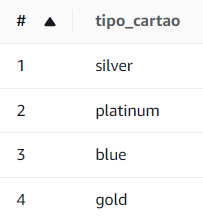

# **3. Análise dos Dados**

Após realizar a exploração para compreender as informações disponíveis no conjunto de dados, vamos agora analisar essas informações para identificar alguns possíveis padrões e relações entre os dados.

**3.1 Quantos clientes são homens e quantos são mulheres?**

**QUERY**: select count(*), sexo from credito group by sexo;

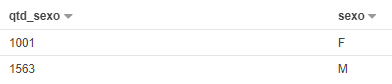




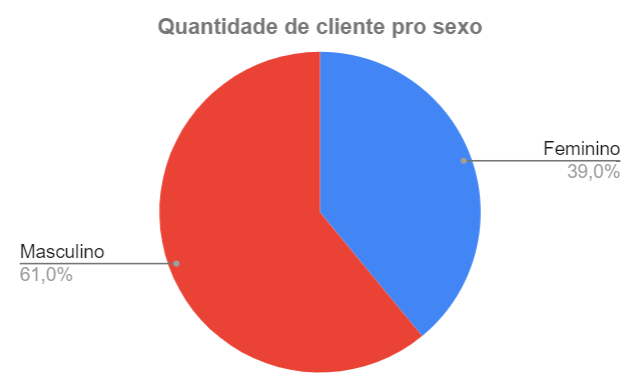

> Analisando o gráfico acima, podemos identificar que a quantidade de clientes do sexo masculino é significativamente maior do que a do sexo feminino.

**3.2 Qual a quantidade de clientes por faixa salarial?**

**QUERY**: select count(*), salario_anual from credito group by salario_anual;

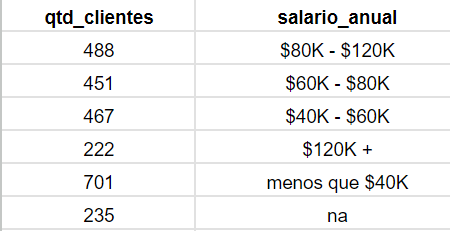

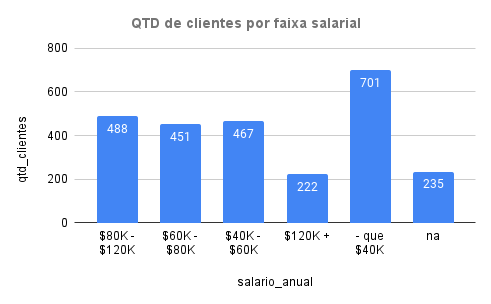

> A predominância na base de dados é de clientes com renda inferior a 40 mil, seguido por clientes com faixa salarial entre 80K a 120K. Essa característica sugere oportunidades de foco estratégico para a empresa em duas direções: no segmento de menor renda, buscando atender às necessidades específicas desse grupo, e em ações direcionadas para clientes com renda acima de 80K, visando explorar oportunidades nesse segmento mais elevado.

**3.3 Quais as características dos clientes que possuem os maiores creditos?**

**QUERY**: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

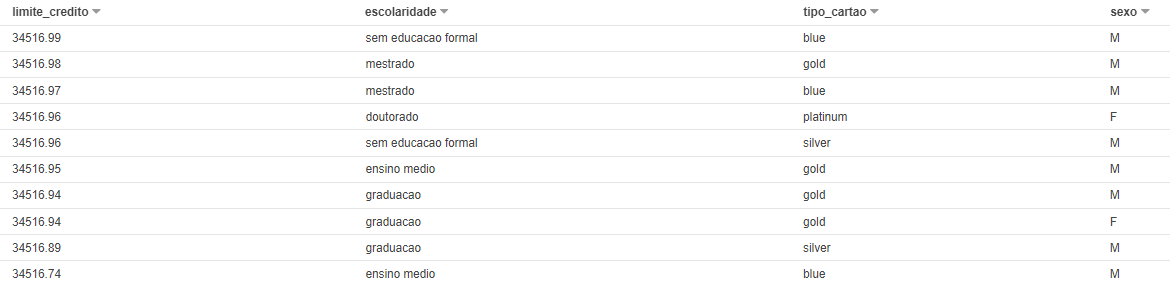


> Pelos dados, podemos inferir que a escolaridade não possui um impacto expressivo em relação aos limites. No entanto, observamos que os clientes com limites mais elevados são predominantemente do sexo masculino.

**3.4 Quais as características dos clientes que possuem os menores creditos?**

**QUERY**: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc

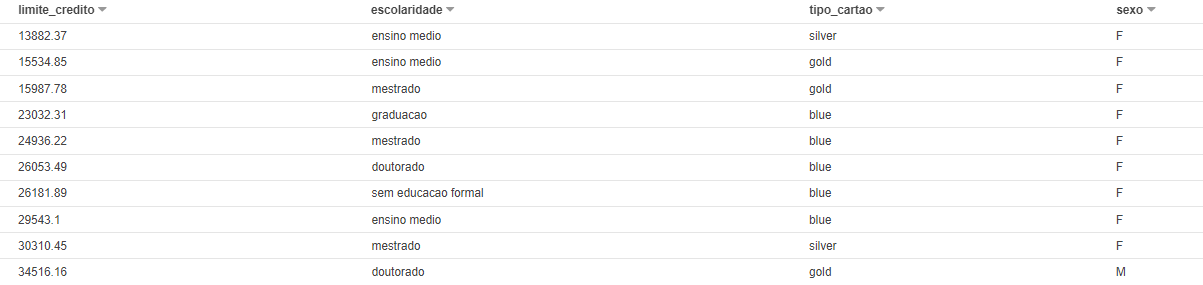

> Aqui, é possível identificar que os clientes com menores limites de crédito são predominantemente do sexo feminino, revelando uma tendência  entre ambos os conjuntos de dados.

**3.5 Qual a media de gastos das mulheres e homens?**

**QUERY**: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

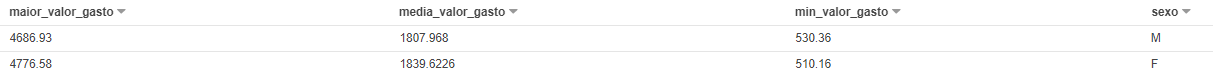

> Apesar da diferença de limites, observamos que os gastos entre ambos os sexos são semelhantes.

**3.6 Será que o salário impacta no limite?**

**QUERY**: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

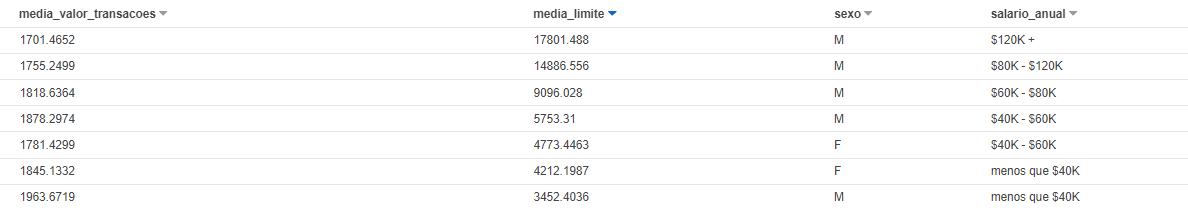

> Nitidamente, podemos perceber a relação entre salário e limite de crédito, onde clientes com salários mais elevados tendem a possuir limites de crédito maiores.

**3.7 Qual a quantidade de clientes por escolaridade?**

**QUERY**: select count(*), escolaridade from credito group by escolaridade;

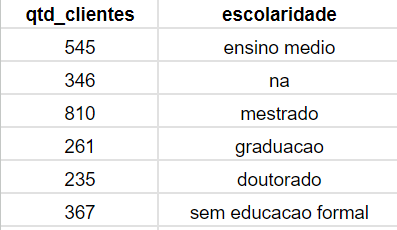

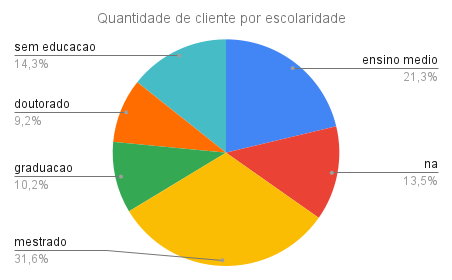

> Podemos identificar que a maior parte dos clientes possui mestrado, correspondendo a 31,6%, seguido por 21,3% que possuem ensino médio. Essa informação sugere oportunidades para ações de marketing e vendas direcionadas a esses dois públicos distintos.

# **4. Conclusão**

Com base na exploração e análise dos dados de crédito, extraímos alguns insights interessantes que foram compilados abaixo:

* A maioria significativa dos clientes é do sexo masculino.
* A grande parte dos clientes apresenta uma renda de até 40K.
* A escolaridade não demonstra influência significativa no limite ou tipo de cartão.
* Clientes com limites mais elevados são predominantemente homens, enquanto os de limites mais baixos são em sua maioria mulheres.
* A faixa salarial exerce um impacto direto no limite de crédito.
* Não foram identificados clientes do sexo feminino com salário anual acima de 60K.
* A média de gastos não parece exercer influência no limite de crédito.










> **Com base nestes insights, podemos planejar estratégias em duas direções: no segmento de menor renda, buscando atender às necessidades específicas desse grupo; e em ações direcionadas para clientes com renda acima de 80K, visando explorar oportunidades nesse segmento mais elevado.**

> **E também, podemos realizar uma exploração mais aprofundada para compreender as razões pelas quais as mulheres apresentam um limite de crédito inferior, identificando possíveis causas subjacentes. Esse aprofundamento pode fornecer insights valiosos para ajustar estratégias e promover uma maior equidade nas condições de crédito.**
